# ******ENmix******

https://www.bioconductor.org/packages/release/bioc/vignettes/ENmix/inst/doc/ENmix.html

O ENmix, assim como o minfi, possui um sistema de classes e objetos. Além disso, o ENmix ainda permite a portabilidade desses objetos, sendo possível a interação entre objetos minfi, ENmix, wateRmelon e chAMPs

***
## Classes do ENmix

* **rgDataSet** contém dados brutos (incluindo probes de controle interno) do arquivo IDAT, anotação CpG do arquivo de *manifest* Illumina e/ou informações de amostra (placa, matriz e fenótipos) fornecidas pelos usuários. Os dados de intensidade da matriz são organizados por probe (não pelo locus CpG) nos canais vermelho e verde.

* **methDataSet** contém valores de intensidade metilados e não metilados (organizados por CpG), anotação CpG do arquivo de *manifest* Illumina e/ou informações de amostra (placa, matriz e fenótipos) fornecidas pelos usuários.

***
## Fluxograma de trabalho do ENmix
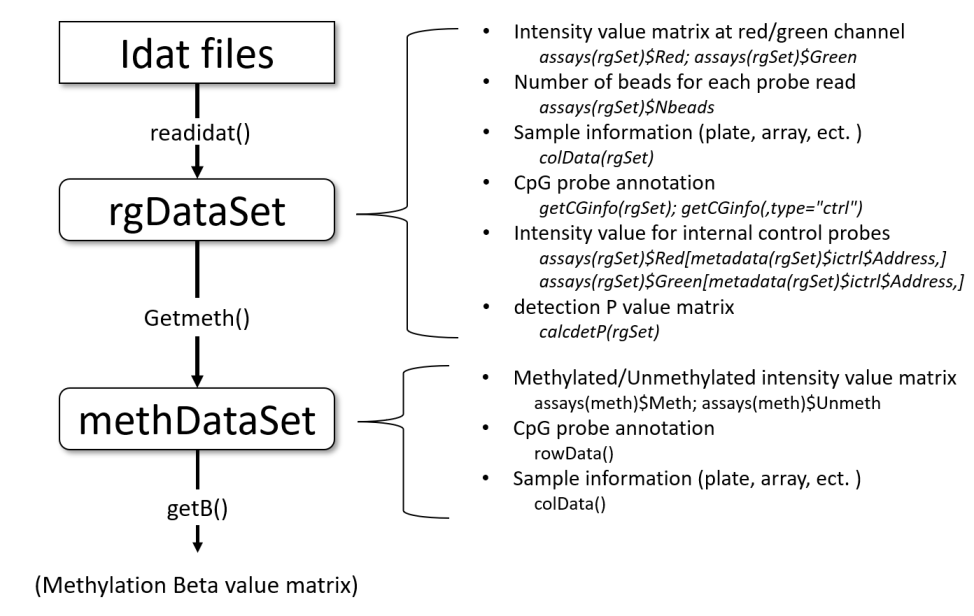

In [1]:
system("mkdir ~/Documents/Epigenetica_curso_pipeline/ENmix")
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/ENmix/")
basedir = getwd()
date="June4th2024"
dataDirectory <- ("/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata/")

In [2]:
library(ENmix)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiff

In [3]:
sheet=read.csv(file.path(dataDirectory,"phenotype_file.csv"))
head(sheet)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM8288007,204963470004_R01C01,GSM8288007_204963470004_R01C01,204963470004,R01C01,m
2,GSM8288008,204963470004_R02C01,GSM8288008_204963470004_R02C01,204963470004,R02C01,m
3,GSM8288009,204963470004_R03C01,GSM8288009_204963470004_R03C01,204963470004,R03C01,m
4,GSM8288010,204963470004_R04C01,GSM8288010_204963470004_R04C01,204963470004,R04C01,m
5,GSM8288011,204963470004_R05C01,GSM8288011_204963470004_R05C01,204963470004,R05C01,m
6,GSM8288012,204963470004_R06C01,GSM8288012_204963470004_R06C01,204963470004,R06C01,m


In [4]:
library(IlluminaHumanMethylationEPICanno.ilm10b2.hg19)
rgSet <- readidat(path = dataDirectory)
rgSet

Loading required package: minfi

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: bumphunter

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02


Attaching package: ‘locfit’


The following object is masked from ‘package:purrr’:

    none


[readidat] Found 20 files with suffix _Grn.idat

[readidat] Found 20 files with suffix _Red.idat

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncatin

class: rgDataSet 
dim: 1009115 20 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1009115): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(20): GSM8288007_204963470004_R01C01
  GSM8288008_204963470004_R02C01 ... GSM8288025_204963470085_R03C01
  GSM8288026_204963470085_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

In [5]:
rgSet

class: rgDataSet 
dim: 1009115 20 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1009115): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(20): GSM8288007_204963470004_R01C01
  GSM8288008_204963470004_R02C01 ... GSM8288025_204963470085_R03C01
  GSM8288026_204963470085_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

## ENmix Quality control - QCinfo()

### Controle de internal probes
A função plotCtrl gera diversos gráficos de controle de qualidade da amostra em comparação aos control probes. A função irá salvar o .png desses gráficos no seu dretório de trabalho.

In [101]:
plotCtrl(rgSet)

Plotting  STAINING .jpg 
Plotting  EXTENSION .jpg 
Plotting  HYBRIDIZATION .jpg 
Plotting  TARGET_REMOVAL .jpg 
Plotting  BISULFITE_CONVERSION_I .jpg 
Plotting  BISULFITE_CONVERSION_II .jpg 
Plotting  SPECIFICITY_I .jpg 
Plotting  SPECIFICITY_II .jpg 
Plotting  NON-POLYMORPHIC .jpg 
Plotting  NEGATIVE .jpg 
Plotting  NORM_A .jpg 
Plotting  NORM_C .jpg 
Plotting  NORM_G .jpg 
Plotting  NORM_T .jpg 
Plotting  NORM_ACGT .jpg 


### *Data distribuition plots*

A partir do MethylSet ou dos valroes de beta, podemos gerar distribuições uteis para summarizar os dados, inspeção visual e identificação de outliers


In [34]:
mraw <- getmeth(rgSet)

In [11]:
mraw

class: methDataSet 
dim: 866297 20 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(866297): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(20): GSM8288007_204963470004_R01C01
  GSM8288008_204963470004_R02C01 ... GSM8288025_204963470085_R03C01
  GSM8288026_204963470085_R04C01
colData names(0):
PreprocessMethod:   

In [73]:
beta<-getB(mraw)
anno=rowData(mraw)
beta1=beta[anno$Infinium_Design_Type=="I",]
beta2=beta[anno$Infinium_Design_Type=="II",]



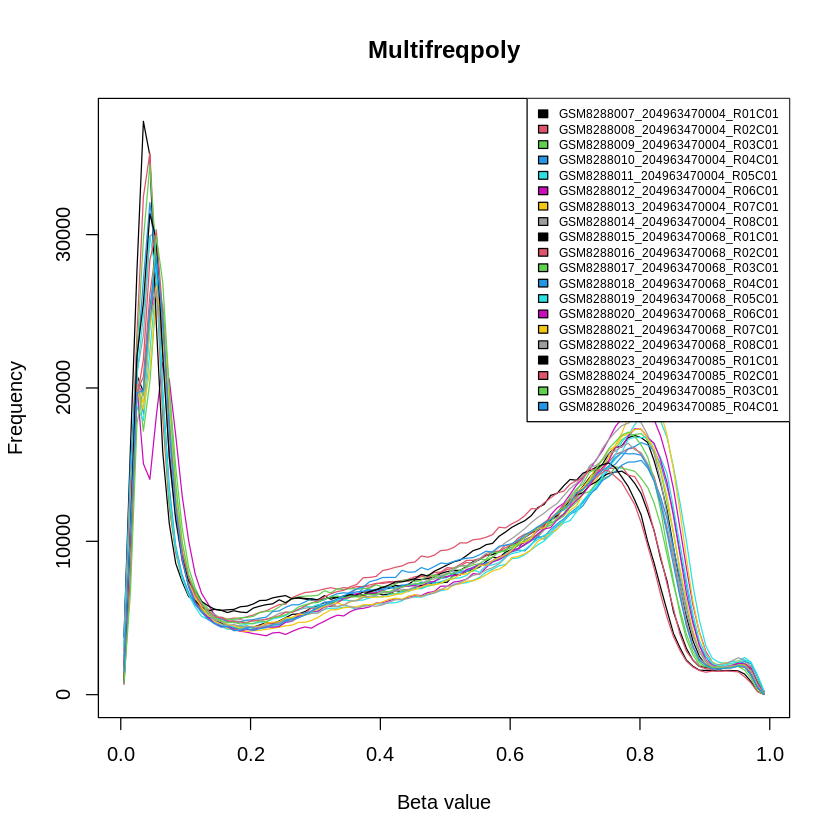

In [81]:
multifreqpoly(beta,main="Multifreqpoly",xlab="Beta value", 
              legend = list(x = "topright", fill=1:ncol(beta),cex =0.6,
                            legend = if(is.null(colnames(beta))) paste(1:ncol(beta)) else colnames(beta)) )

***
### Gerando QC e Methylation data set

A função QCinfo é uma função automatiada de controle de qualidade do ENmix que avalia:
* % de CpGs de baixa qualidade
* Identifica outliers baseado em beta ou no valor intensidade total de metilação/não-metilação
* Faz plotagem de gráficos de densidade de beta antes e depois do QC
* devolve uma matrix com os valors corrigidos.

In [69]:
qc<-QCinfo(rgSet,detPtype="negative",detPthre=0.000001)

0  samples with percentage of low quality CpG value greater than  0.05  or bisulfite intensity less than  8517.275 
7947  CpGs with percentage of low quality value greater than  0.05 
Ploting qc_sample.jpg ...Done
Ploting qc_CpG.jpg ...Done
Identifying ourlier samples based on beta or total intensity values...
After excluding low quality samples and CpGs
0  samples are outliers based on averaged total intensity value 
0  samples are outliers in beta value distribution 
0  outlier samples were added into badsample list
Ploting freqpolygon_beta_beforeQC.jpg ...Done
Ploting freqpolygon_beta_afterQC.jpg ...Done


***
### preprocessENmix

A função preprocessENmix gera o MethylDataset realizando a correção de ruídos de fundo (*background-correction*) e correção por *dye-bias*. 

In [21]:
mdat <- preprocessENmix(rgSet, bgParaEst="oob", dyeCorr="RELIC",
                      QCinfo=qc, nCores=3)

7947  CpGs were excluded before ENmix correction
Analysis is running, please wait...!


***
Observando o objeto mdat

In [22]:
mdat

class: methDataSet 
dim: 858350 20 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(858350): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(20): GSM8288007_204963470004_R01C01
  GSM8288008_204963470004_R02C01 ... GSM8288025_204963470085_R03C01
  GSM8288026_204963470085_R04C01
colData names(0):
PreprocessMethod:  Backgroud_corr: ENmix,oob dyeBiasCorrection: RELIC 

## Normalização

No pacote ENmix, podemos realizar a normalização através da função **norm.quantile**. Essa função trabalha com a normalização por quantil.

In [23]:
mdat.norm <- norm.quantile(mdat, method = "quantile1")

Analysis is running, please wait...! 


In [28]:
mdat.norm

class: methDataSet 
dim: 858350 20 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(858350): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(20): GSM8288007_204963470004_R01C01
  GSM8288008_204963470004_R02C01 ... GSM8288025_204963470085_R03C01
  GSM8288026_204963470085_R04C01
colData names(0):
PreprocessMethod:  Backgroud_corr: ENmix,oob dyeBiasCorrection: RELIC Normalization: quantile1 

***
### Valores de Beta normalizados 

A partir da normalização por quantil realizada acima, podemos obter os valores de beta normalizados. Em seguida, é possível plotar gráficos de densidade e comparar como a normalização afetou os valores de beta.

In [24]:
beta.norm <- getB(mdat.norm)

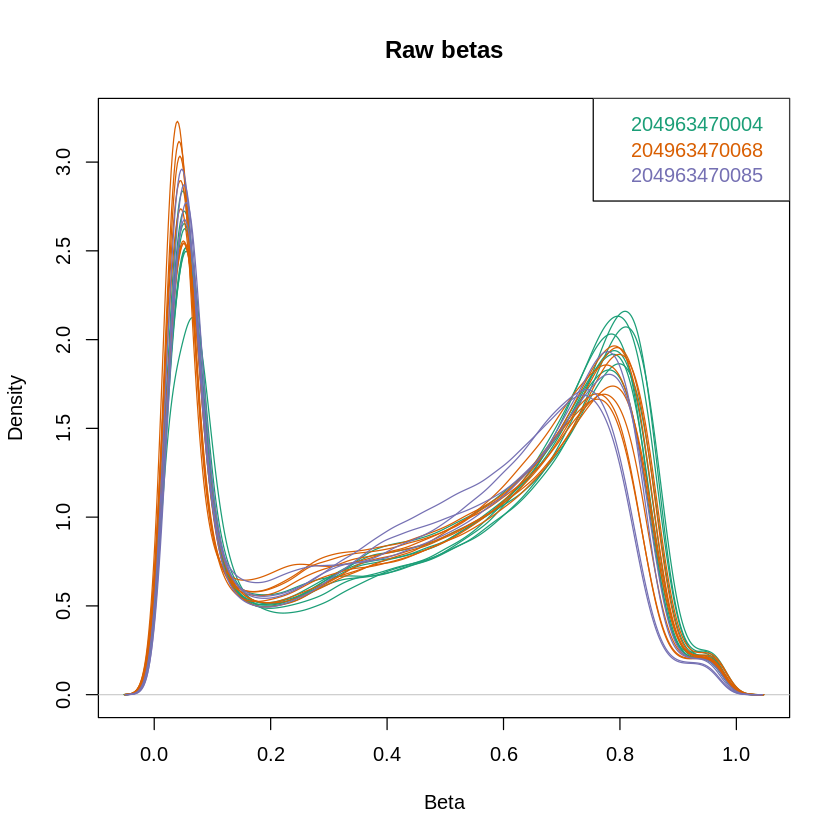

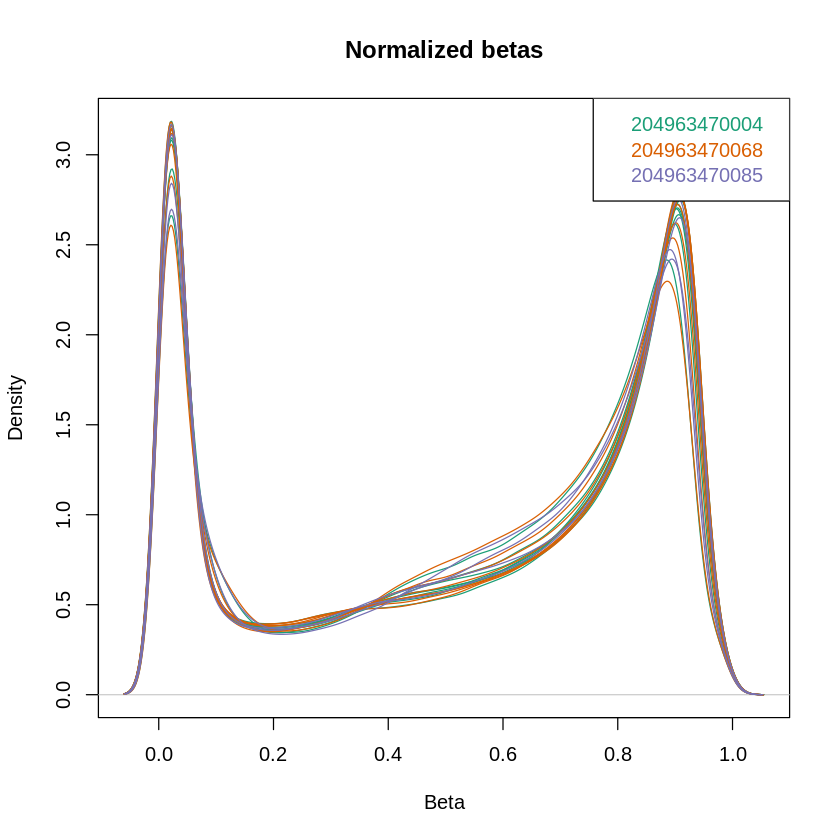

In [92]:
densityPlot(beta, sampGroups = sheet$Sentrix_ID, main ="Raw betas")
#multifreqpoly(beta.norm,main="Multifreqpoly: Quantile Nornalization",xlab="Beta value",legend = NULL)
densityPlot(beta.norm, sampGroups = sheet$Sentrix_ID, main ="Normalized betas")

***
Incorporando os dados fenotípicos nos dados ao mdat


In [67]:
colData(mdat.norm)=as(sheet[colnames(mdat),],"DataFrame")
mdat.norm

class: methDataSet 
dim: 858350 20 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(858350): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(20): NA NA.1 ... NA.18 NA.19
colData names(6): GeoID SampleID ... Sentrix_Position Sex
PreprocessMethod:  Backgroud_corr: ENmix,oob dyeBiasCorrection: RELIC Normalization: quantile1 

***
### probe-type bias adjustment



In [95]:
beta <- rcp(x = mdat, qcscore = qc)

ERROR: Error in rcp(x = mdat, qcscore = qc): unused argument (x = mdat)


***
### Filtrar data points de baixa qualidade para cada probe
* Linhas(probes) e colunas(indivíduos) com muitas informações faltantes serão removidos
* Caso seja especificad, pode ser realizada uma inputação para preencher dados faltentes

In [93]:
beta.norm.filter <- qcfilter(beta.norm,qcscore=qc,rmcr=TRUE, rthre=0.05,
                   cthre=0.05,impute=TRUE)

12229  rows with percentage of missing data greater than  0.15  were excluded
0  columns with percentage of missing data greater than  0.05  were excluded


***
### Regressão de componentes principais
Primeiro, a análise de componentes principais será realizada na matriz de valor beta padronizada (sonda padronizada por sonda) e, em seguida, o número especificado de componentes principais principais (que explicam a maior parte da variação dos dados) será usado para realizar a regressão linear com cada variável especificada, tal como variáveis ​​de lote ou fenótipo. Os valores de regressão P serão plotados para explorar a estrutura de variância dos dados de metilação e para identificar possíveis variáveis ​​de confusão para orientar a análise estatística de associação. Os componentes principais são ordenados de acordo com a porcentagem de variância que explicam, de grande para pequeno. O PCA não permitirá valores ausentes, portanto especifique impute=true no pré-processamento (qcfilter()) se houver dados ausentes.


***










***

https://support.illumina.com/array/array_kits/infinium-methylationepic-beadchip-kit/downloads.html

install wget before using "brew install wget" 

In [ ]:
system("wget https://webdata.illumina.com/downloads/productfiles/methylationEPIC/infinium-methylationepic-v-1-0-b5-manifest-file-csv.zip")
unzip("infinium-methylationepic-v-1-0-b5-manifest-file-csv.zip")
mf="infinium-methylationepic-v-1-0-b5-manifest-file-csv"

In [9]:
sheet$Basename

[1] "GSM8288007_204963470004_R01C01" "GSM8288008_204963470004_R02C01"
 [3] "GSM8288009_204963470004_R03C01" "GSM8288010_204963470004_R04C01"
 [5] "GSM8288011_204963470004_R05C01" "GSM8288012_204963470004_R06C01"
 [7] "GSM8288013_204963470004_R07C01" "GSM8288014_204963470004_R08C01"
 [9] "GSM8288015_204963470068_R01C01" "GSM8288016_204963470068_R02C01"
[11] "GSM8288017_204963470068_R03C01" "GSM8288018_204963470068_R04C01"
[13] "GSM8288019_204963470068_R05C01" "GSM8288020_204963470068_R06C01"
[15] "GSM8288021_204963470068_R07C01" "GSM8288022_204963470068_R08C01"
[17] "GSM8288023_204963470085_R01C01" "GSM8288024_204963470085_R02C01"
[19] "GSM8288025_204963470085_R03C01" "GSM8288026_204963470085_R04C01"